# Heart Rate Prediction Project
This notebook performs an analysis and prediction of heart rate using the Framingham dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Load dataset

Loading the dataset means reading a data file from a source (local machine, cloud, or database) and storing it into a data structure (like a DataFrame in Python using pandas) for further analysis or model building.

In [2]:
import pandas as pd

# Load a CSV file into a pandas DataFrame
df = pd.read_csv('framingham.csv')
print(df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

# Checking for null values
 
Null values (or missing values) are data points where no value is stored. They can affect model performance and need to be handled. We check for them to understand how many entries are incomplete.    

In [3]:
# Checking for null values in each column
print(df.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


# Filling missing values with median

One way to handle missing data is by replacing (imputing) them with the median value of the respective column. The median is preferred over the mean when data has outliers.

In [4]:
# Filling missing values using the median of each numeric column
df.fillna(df.median(numeric_only=True), inplace=True)

In [5]:
# Checking for null values in each column
print(df.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


# Basic statistics and visualization

Before modeling, it's important to explore the data. Descriptive statistics help summarize the central tendency, dispersion, and shape of the data’s distribution. Visualization helps us identify patterns, outliers, or relationships.

###  Descriptive Statistics

In [6]:
# Displaying basic statistics for all columns
print(df.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4240.000000    4240.000000  4240.000000   
mean      0.429245    49.580189     1.979953       0.494104     8.944340   
std       0.495027     8.572942     1.007087       0.500024    11.904777   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4240.000000      4240.000000   4240.000000  4240.000000  4240.000000   
mean      0.029245         0.005896      0.310613     0.025708   236.667689   
std       0.168513         0.076569      0.462799     0.158280    44.328480   

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None


In [9]:
print(df.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [10]:
print(df.size)

67840


In [11]:
print(df.ndim)

2


### Visualizing the Distribution of Heart Rate

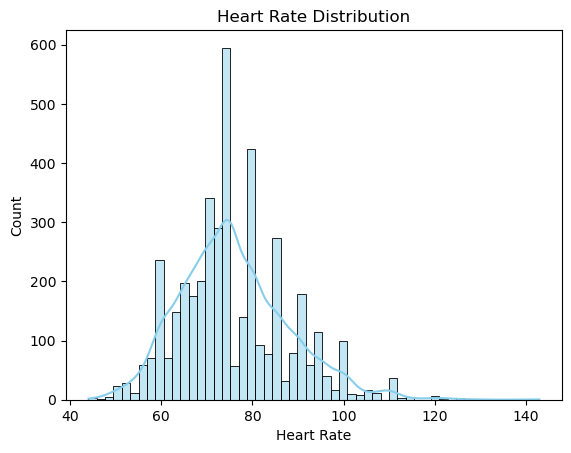

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram of heart rate
sns.histplot(df['heartRate'], kde=True, color='skyblue')
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.show()

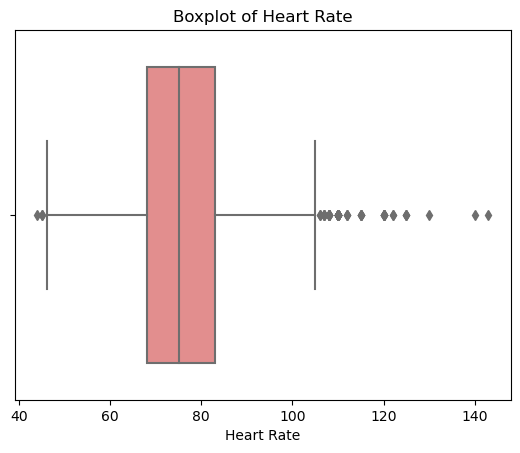

In [15]:
# Boxplot to check for outliers in heart rate
sns.boxplot(x=df['heartRate'], color='lightcoral')
plt.title('Boxplot of Heart Rate')
plt.xlabel('Heart Rate')
plt.show()

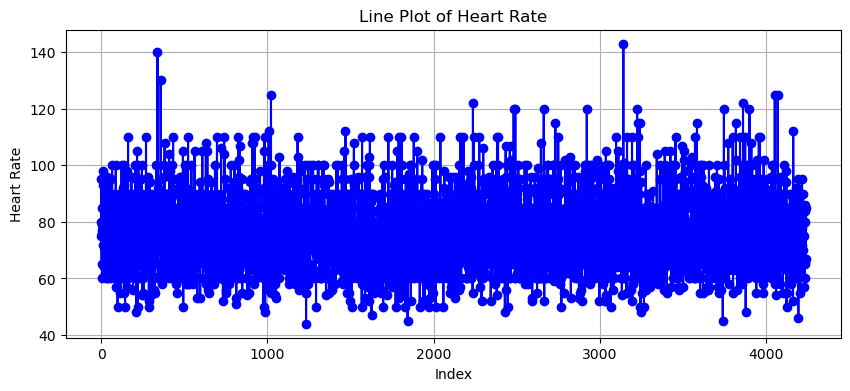

In [16]:
# Line plot of heart rate over data index
plt.figure(figsize=(10, 4))
plt.plot(df['heartRate'], color='blue', marker='o', linestyle='-')
plt.title('Line Plot of Heart Rate')
plt.xlabel('Index')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

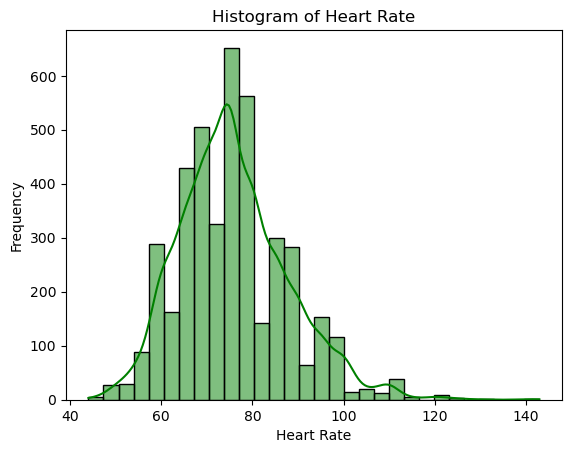

In [17]:
# Histogram of heart rate
sns.histplot(df['heartRate'], bins=30, kde=True, color='green')
plt.title('Histogram of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

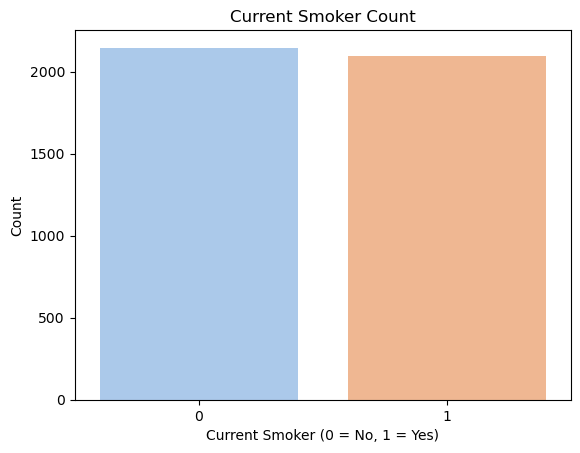

In [18]:
# Bar plot: count of smokers vs non-smokers
sns.countplot(x='currentSmoker', data=df, palette='pastel')
plt.title('Current Smoker Count')
plt.xlabel('Current Smoker (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

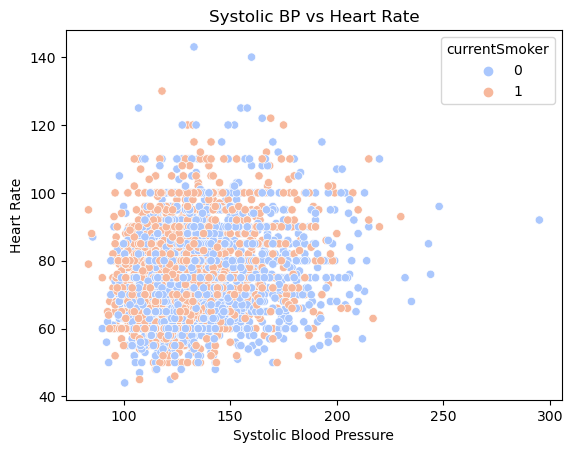

In [19]:
# Scatter plot of systolic BP vs heart rate
sns.scatterplot(x='sysBP', y='heartRate', data=df, hue='currentSmoker', palette='coolwarm')
plt.title('Systolic BP vs Heart Rate')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Heart Rate')
plt.show()

# Correlation heatmap


A correlation heatmap helps visualize how strongly pairs of variables in a dataset are related. The correlation coefficient values (ranging from -1 to +1) are represented using a color gradient:

- +1 indicates a perfect positive correlation

- -1 indicates a perfect negative correlation

- 0 means no correlation


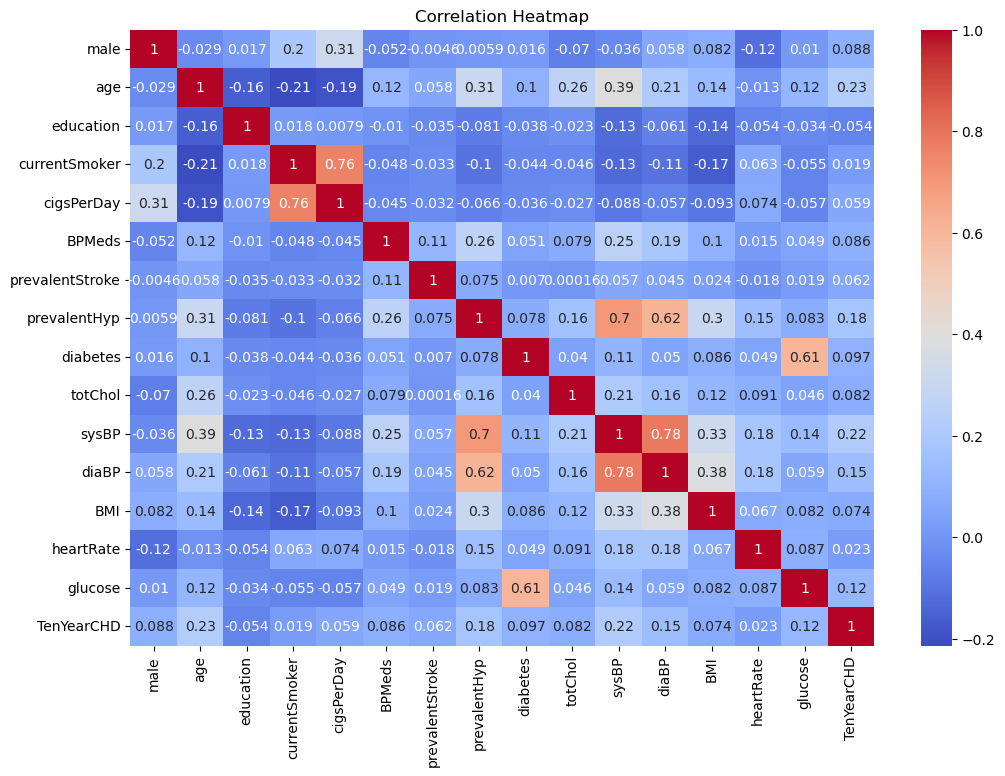

In [20]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Model Preparation:
Model Preparation is the process of setting up all the necessary components required to train a machine learning model. This includes selecting the algorithm, splitting the dataset, scaling the features, and initializing the model before training begins.

**Key Steps in Model Preparation:**

- **Splitting the dataset** into training and testing sets (e.g., using train_test_split in Python).

- **Feature scaling or normalization** (e.g., using StandardScaler or MinMaxScaler) to ensure all features contribute equally.

- **Choosing the appropriate algorithm** (e.g., Logistic Regression, Decision Tree, etc.).

- **Initializing the model** with parameters.

- **Setting up evaluation metrics** (e.g., accuracy, precision, recall) for assessing performance later.



In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features and target

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']


# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics

Evaluation metrics are quantitative measures used to assess the performance of a machine learning model. They help determine how well the model makes predictions, especially on unseen data.

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8549528301886793
Confusion Matrix:
[[717   8]
 [115   8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.50      0.07      0.12       123

    accuracy                           0.85       848
   macro avg       0.68      0.53      0.52       848
weighted avg       0.81      0.85      0.80       848



## Conclusion
- We used the Framingham dataset to predict the risk of heart disease within ten years.
- After preprocessing and exploring the dataset, we used logistic regression for prediction.
- The model provides a reasonable accuracy, and the evaluation metrics show potential for use in early detection.
- Further tuning or trying more advanced models could improve performance.
